**Loading Libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from wordcloud import WordCloud


**Loading Data**

In [ ]:
# Load dataset
df = pd.read_csv("/content/Twitter_Emotion_Dataset.csv", encoding="latin1")

# Check data
df.head()


,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


**Removing Null Values**

In [ ]:
df = df.dropna()


**Removing Duplicate Records**

In [ ]:
df = df.drop_duplicates()


[link text](https://)**Label Encoding (twiter)**

In [ ]:

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

print(le.classes_)


['anger' 'fear' 'happy' 'love' 'sadness']


**Text Cleaning & NLP Preprocessing**

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['processed_text'] = df['tweet'].apply(clean_text)

df[['tweet', 'processed_text']].head()

,tweet,processed_text
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jln jatibarupolisi tdk bs gertak gubernur...
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",sesama cewe lho kayaknya harusnya bisa lebih r...
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto dari goo...
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibarubagian dari wilayah tn abangpengat...
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam batalin tik...


**WordCloud for emotion Type**


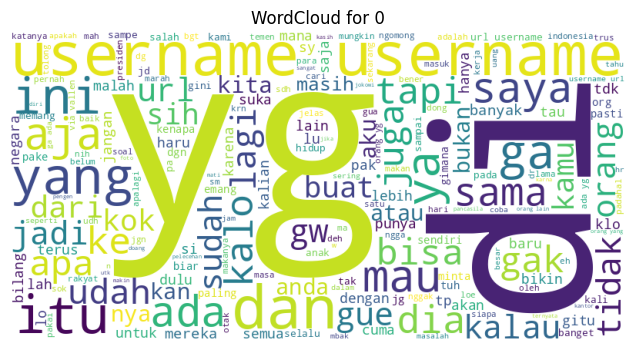

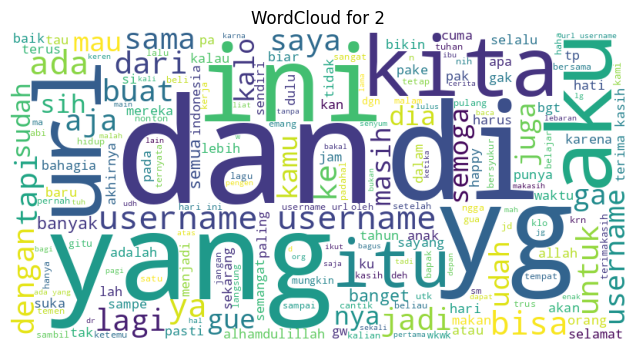

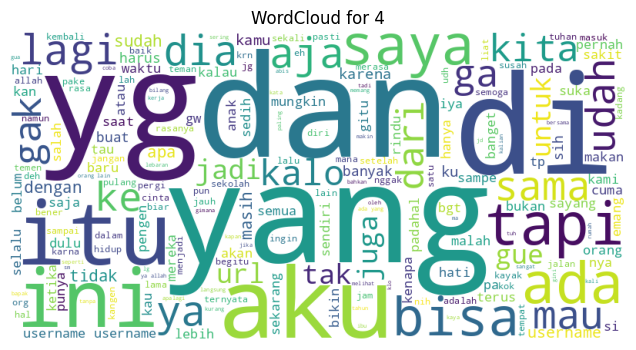

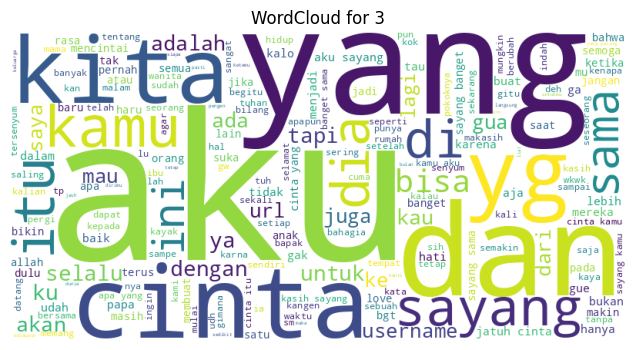

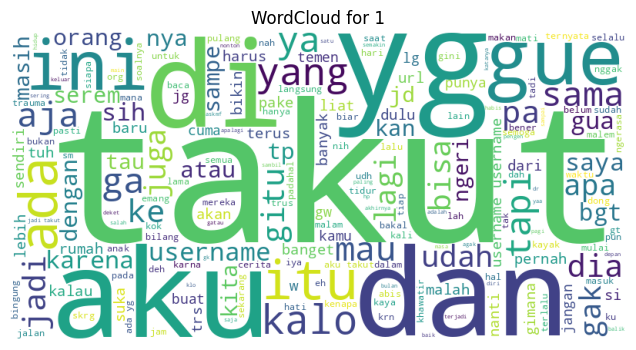

In [ ]:
emotion = df['label'].unique()

for em in emotion:
    emotion_text = " ".join(
        df[df['label'] == em]['processed_text']
    )

    wc = WordCloud(
        width=800,
        height=400,
        background_color="white"
    ).generate(emotion_text)

    plt.figure(figsize=(8,4))
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"WordCloud for {em}")
    plt.show()

 **TF-IDF + Model using Pipeline**

In [ ]:
X = df['processed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        max_features=5000
    )),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('classifier', LogisticRegression(max_iter=1000))])

**Model Evaluation**

In [ ]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.6343963553530751

Classification Report:

              precision    recall  f1-score   support

       anger       0.58      0.72      0.64       218
        fear       0.82      0.58      0.68       129
       happy       0.64      0.62      0.63       211
        love       0.84      0.72      0.77       127
     sadness       0.50      0.54      0.52       193

    accuracy                           0.63       878
   macro avg       0.68      0.63      0.65       878
weighted avg       0.65      0.63      0.64       878



**Predict a Manual Sentence (After Model Training)**

In [ ]:
# Manual input sentence
manual_text = "i hate my goverment i want justice"
manual_text_cleaned = clean_text(manual_text)
predicted_label = pipeline.predict([manual_text_cleaned])[0]
predicted_disease = le.inverse_transform([predicted_label])[0]
print("Predicted emotion Type:", predicted_disease)


Predicted emotion Type: sadness
